<a href="https://colab.research.google.com/github/gustavopierre/data_science_portfolio/blob/master/Um_Passo_a_Passo_Para_Analise_Crimes_na_Irlanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Garda Síochána](https://github.com/gustavopierre/data_science_portfolio/blob/master/garda_hq.jpg?raw=true)

# Um Passo a Passo para Análise dos Crimes na Irlanda
-----
## Introdução
A República da Irlanda é um estado soberano da Europa, cuja capital é Dublin. Considerado um país desenvolvido, tem o terceiro Índice de Desenvolvimento Humano (IDH) do mundo e ótimas classificações em índices que medem o grau de democracia e liberdades como a de imprensa, econômica e política. <br>
No entanto, a Irlanda já foi um dos países mais pobres da Europa. Apresentou uma rápida expansão da economia a partir do final da década de 80, principalmente de 1995 a 2007. A partir de 2008 sofreu uma crise financeira sem precedentes. No entanto, a economia irlandesa voltou a crescer a partir de 2012 e, em 2017, cresceu três vezes mais que qualquer outro país europeu.<br>
Este projeto tem como tema apresentar um passo a passo bara a busca de informações relativas aos crimes ocorridos na Irlanda com base em dados obtidos na internet. <br>
O policiamento na Irlanda é provido pela *Garda Síochána* (Guarda da Paz), que é a força policial civil da República da Irlanda, com atribuições de polícia judiciária e polícia preventiva uniformizada. Tem a sua Central de Polícia localizada em Dublin, em Phoenix Park. Sua atuação operacional divide o país em quatro regiões policiais, estas divididas em 28 Divisões. Estas divisões estão em fase de redução para 19 com a fusão de algumas regiões.<br>
Como segundo trabalho do Curso de Ciência de Dados, vamos seguir um passo a passo para obter informações sobre os crimes na Irlanda abrangendo as etapas de obtenção dos dados, análise exploratória dos mesmos e exibição das informações relativas à eles.

## Obtenção dos Dados
### A Busca
Tendo a tarefa definida de analisar os crimes na Irlanda, iniciamos a busca pelos dados.Esta é uma parte importante neste processo. Os primeiros sites procurados foram os [Escritório Central de Estatísticas (Central Statistics Office - CSO)](https://www.cso.ie/en/index.html) e [Portal de Dados Abertos da Irlanda](https://data.gov.ie/), ambos possuem uma séries de conjunto de dados sobre diversos temas referentes à Irlanda, inclusive dados de geometria de áreas. Apesar da ênfase nas buscas ter sido nesses dois sites, a busca por outros sites na internet foi realizada, mas nada relevante foi encontrado ou terminava em subdomínios do site do CSO. <br>
### Que Dados Escolher?
Em virtude da existência de diversos conjuntos de dados de crimes fornecidos pela CSO, foi decidido utilizar o conjunto de dados que fornecesse a melhor combinação de três fatores: detalhamento do tipo de crime, área de atuação da *Garda* e a divisão dos dados no tempo. Desejávamos os dados em que os tipos de crimes estivessem mais especificados. A *Garda* começou a dividir os crimes por tipos na década de 20 e vem evoluindo esta classificação ao longo do tempo. O Sistema Irlandês de Classificação de Crimes (ICCS - Irish Crime Classification System) divide os crimes em 16 tipos mais genéricos e, dentro destes, tipos mais específicos, cada um com seu código específico. Quanto ao fator distribuição geográfica, buscamos a informação que pudesse nos fornecer um dado referente às cidades. Este fator geográfico implicaria também na escolha dos dados geométricos das áreas analisadas para uma possível visualização em um mapa. O terceiro e último fator, era a divisão dos dados no tempo. Quanto mais específico, melhor seria para uma boa análise. <br> 
Decidimos por usar os dados da *Garda Síochána* dos tipos de crimes mais especificados, divididos por divisões operacionais e por quadrimestre de 2003 até o primeiro quadrimestre de 2020. Para possibilitar a visualização espacial e geograficamente distribuída dos dados, buscamos dados que delimitam estas divisões, que foram encontradas no site do [Censo de 2011](https://www.cso.ie/en/census/census2011boundaryfiles/). 
Foi obtido um [arquivo de dados de crimes](https://drive.google.com/file/d/1OfEWYZNKKjzNq5gm4V8Z_EUGKDLxd_VQ/view?usp=sharing), no formato de valores separados por vírgula (csv), e um [arquivo compactado com os arquivos necessários para os limites geográficos das referidas divisões operacionais](https://github.com/gustavopierre/data_science_portfolio/blob/master/Census2011_Garda_Divisions_Nov2013.zip?raw=true).


## Configuração do Ambiente
Para a carregamento, análise e exploração dos dados, usaremos Python. Para seu uso, serão necessárias as seguintes bibliotecas de funções que serão importadas para o ambiente:

* Pandas - uma biblioteca de uso fácil, que permite ao usuário explorar, manipular e visualizar os dados de um modo bastante eficiente.
* Numpy - uma biblioteca usada, principalmente, para realizar cálculos em vetores multidimensionais.
* Matplotlib - uma biblioteca para visualização de dados.
* Seaborn - uma biblioteca de visualização baseada na Matplotlib.
* Folium - uma biblioteca que permite vizualização de dados manipulados em Python em um mapa interativo.
* Geopandas - é um projeto open source que foi criado para tornar a manipulação de dados geoespaciais no Python uma tarefa mais simples<br>
Iniciamos o código instalando o Geopandas que, por padrão, não vem instalado no ambiente Jupyter.

In [1]:
print("Installing geopandas...")

# We need to install geopandas and descartes using PIP because they are 
# not installed on Jupyter by default. 

!pip install --upgrade geopandas;
#!pip install descartes

Installing geopandas...
     |████████████████████████████████| 962kB 3.2MB/s 
     |████████████████████████████████| 14.7MB 294kB/s 
     |████████████████████████████████| 10.9MB 21.0MB/s 


In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd

##Explorando os Dados
### Arquivo com a Geometria das Divisões
Vamos observar o arquivo shapefile, seus campos e fazer um teste de visualização.


In [8]:
shapefile = gpd.read_file('/content/Census2011_Garda_Divisions_Nov2013.shp')
shapefile.head(3)

,REGION,REG_CODE,DIVISION,DIV_CODE,GEOGID,Male2011,Female2011,Total2011,PPOcc2011,Unocc2011,Vacant2011,HS2011,PCVac2011,CREATEDBY,CREATEDATE,geometry
0,Western Region,02,Galway,0223,K0223,124859.0,125986.0,250845.0,89385.0,21911.0,18823.0,111296.0,16.9,Paul Creaner,30-11-2013,"POLYGON ((202234.404 219542.771, 202195.208 21..."
1,Dublin Metropolitan Region,06,DMR East,0605,K0605,91205.0,99513.0,190718.0,70764.0,8933.0,6229.0,79697.0,7.8,Paul Creaner,30-11-2013,"POLYGON ((320587.313 230164.757, 320666.241 23..."
2,Dublin Metropolitan Region,06,DMR North,0607,K0607,160449.0,171156.0,331605.0,119210.0,12896.0,9651.0,132106.0,7.3,Paul Creaner,30-11-2013,"POLYGON ((316466.866 266374.324, 316474.719 26..."


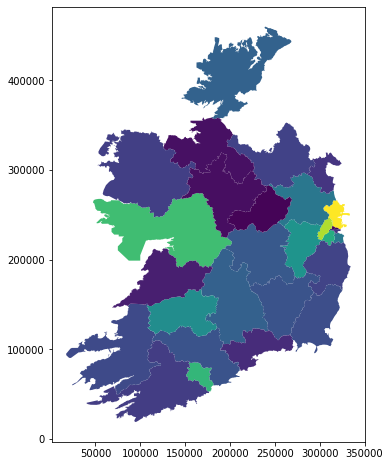

In [9]:
shapefile.plot(column='Male2011', figsize=(16,8));

In [10]:
shapefile.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   REGION      28 non-null     object  
 1   REG_CODE    28 non-null     object  
 2   DIVISION    28 non-null     object  
 3   DIV_CODE    28 non-null     object  
 4   GEOGID      28 non-null     object  
 5   Male2011    28 non-null     float64 
 6   Female2011  28 non-null     float64 
 7   Total2011   28 non-null     float64 
 8   PPOcc2011   28 non-null     float64 
 9   Unocc2011   28 non-null     float64 
 10  Vacant2011  28 non-null     float64 
 11  HS2011      28 non-null     float64 
 12  PCVac2011   28 non-null     float64 
 13  CREATEDBY   28 non-null     object  
 14  CREATEDATE  28 non-null     object  
 15  geometry    28 non-null     geometry
dtypes: float64(8), geometry(1), object(7)
memory usage: 3.6+ KB


Podemos observar que existem 28 registros, um para cada divisão. Não existem valores nulos e temos 16 colunas. Cada coluna refere-se à:
* REGION - nome da região operativa da *Garda* a que pertence aquela divisão;
* REG_COD - código da Região;
* DIVISION - nome da divisão da *Garda*;
* DIV_CODE - código da divisão;
* GEOGID - identificador da geografia;
* Male2011, Female2011, Total2011 - respectivamente as quantidades de homens, mulheres e população de cada área da divisão;
* PPOcc2011 - domicílios particulares permanentes;
* Unocc2011 - o total de habitações desocupadas no Censo;
* Vacant2011 - total de habitações vagas;
* HS2011 - total de habitações;
* PCVac2011 - taxa de desocupação.
* geometry - a geometria da divisão.<br>
Os dados oriundos do censo de 2011 não serão usados neste projeto. Portanto, nós apagaremos essas colunas.

In [11]:
shapefile = shapefile.drop(columns=['Male2011','Female2011','Female2011', 'Total2011','PPOcc2011', 'Unocc2011', 'Vacant2011', 'HS2011','PCVac2011'])
shapefile.head(3)

,REGION,REG_CODE,DIVISION,DIV_CODE,GEOGID,CREATEDBY,CREATEDATE,geometry
0,Western Region,02,Galway,0223,K0223,Paul Creaner,30-11-2013,"POLYGON ((202234.404 219542.771, 202195.208 21..."
1,Dublin Metropolitan Region,06,DMR East,0605,K0605,Paul Creaner,30-11-2013,"POLYGON ((320587.313 230164.757, 320666.241 23..."
2,Dublin Metropolitan Region,06,DMR North,0607,K0607,Paul Creaner,30-11-2013,"POLYGON ((316466.866 266374.324, 316474.719 26..."


### Arquivo dos Dados de Crimes
Abrindo o arquivo em uma planilha ou editor de texto, podemos observar que as três primeira linhas são desnecessárias, então as descartaremos na leitura do arquivo.

![texto alternativo](https://github.com/gustavopierre/data_science_portfolio/blob/master/crimes_ireland_csv.gif?raw=true)

In [12]:
# lendo o arquivo de crimes a partir da quarta linha
df = pd.read_csv('/content/crimes_irlanda.csv', skiprows=3)
# exibindo os valores das primeiras cinco linhas do DataFrame
df.head()

,,.1,"01 ,Homicide offences","0111 ,Murder","0112 ,Manslaughter","0113 ,Infanticide","012 ,Dangerous driving leading to death","02 ,Sexual offences","021 ,Rape and sexual assault","022 ,Other sexual offences","03 ,Attempts/threats to murder, assaults, harassments and related offences","0311 ,Murder-attempt","0312 ,Murder-threat","033 ,Harassment and related offences","034 ,Assault causing harm, poisoning","035 ,Other assault","04 ,Dangerous or negligent acts","0411 ,Dangerous driving causing serious bodily harm","0412 ,Driving/in charge of a vehicle while over legal alcohol limit","0413 ,Driving/in charge of a vehicle under the influence of drugs","0421 ,Endangerment with potential for serious harm/death","0422 ,Abandoning a child, child neglect and cruelty","0423 ,Unseaworthy/dangerous use of boat or ship","0424 ,False alarm/interference with aircraft or air transport facilities","0425 ,Endangering traffic offences","05 ,Kidnapping and related offences","0511 ,False imprisonment","0512 ,Abduction of person under 16 years of age","0513 ,Human trafficking offences","06 ,Robbery, extortion and hijacking offences","0611 ,Robbery of an establishment or institution","0612 ,Robbery of cash or goods in transit","0613 ,Robbery from the person","0621 ,Blackmail or extortion","0631 ,Carjacking, hijacking/unlawful seizure of aircraft/vessel","07 ,Burglary and related offences","0711 ,Aggravated burglary","0712 ,Burglary (not aggravated)","0713 ,Possession of an article (with intent to burgle, steal, demand)","08 ,Theft and related offences","081 ,Theft/taking of vehicle and related offences","0821 ,Theft from person","0822 ,Theft from shop","084 ,Other thefts, handling stolen property","09 ,Fraud, deception and related offences","10 ,Controlled drug offences","1011 ,Importation of drugs","1012 ,Cultivation or manufacture of drugs","1021 ,Possession of drugs for sale or supply","1022 ,Possession of drugs for personal use","103 ,Other drug offences","11 ,Weapons and Explosives Offences","111 ,Explosives, chemical weapons offences","1121 ,Discharging a firearm","1122 ,Possession of a firearm","113 ,Offensive weapons offences (n.e.c.)","114 ,Fireworks offences","12 ,Damage to property and to the environment","1211 ,Arson","1212 ,Criminal damage (not arson)","1221 ,Litter offences","13 ,Public order and other social code offences","131 ,Disorderly conduct","132 ,Trespass offences","133 ,Liquor licensing offences","134 ,Prostitution offences","135 ,Regulated betting/money, collection/trading offences","136 ,Social code offences (n.e.c.)","15 ,Offences against government, justice procedures and organisation of crime","151 ,Offences against government and its agents","152 ,Organisation of crime and conspiracy to commit crime","153 ,Perverting the course of justice","157 ,Offences while in custody, breach of court orders"
0,2003Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,"11 ,Cavan/Monaghan Garda Division",1.0,0.0,0.0,0.0,1.0,24.0,24.0,0.0,128.0,0.0,0.0,13.0,21.0,94.0,125.0,1.0,119.0,1.0,0.0,2.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,136.0,0.0,136.0,0.0,248.0,42.0,20.0,45.0,141.0,33.0,26.0,0.0,0.0,11.0,15.0,0.0,6.0,0.0,0.0,1.0,5.0,0.0,145.0,5.0,139.0,1.0,243.0,199.0,6.0,34.0,0.0,0.0,4.0,32.0,1.0,0.0,1.0,30.0
2,,"12 ,Donegal Garda Division",1.0,0.0,0.0,0.0,1.0,34.0,33.0,1.0,215.0,0.0,1.0,38.0,49.0,127.0,87.0,0.0,83.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,3.0,0.0,3.0,0.0,0.0,112.0,0.0,112.0,0.0,287.0,43.0,16.0,41.0,187.0,19.0,78.0,0.0,1.0,11.0,58.0,8.0,8.0,0.0,2.0,3.0,3.0,0.0,298.0,13.0,285.0,0.0,352.0,287.0,7.0,46.0,0.0,0.0,12.0,19.0,4.0,0.0,4.0,11.0
3,,"13 ,Sligo/Leitrim Garda Division",1.0,1.0,0.0,0.0,0.0,15.0,14.0,1.0,68.0,0.0,0.0,9.0,22.0,37.0,52.0,0.0,50.0,0.0,0.0,1.0,0.0,0.0,1.

O cabeçalho do conjunto de dados tem alguns problemas, precisaremos redefinir os nomes dos campos. Podemos observar que o ano e quadrimestre estão num mesmo campo e só aparece numa primeira linha antes de todos os dados de cada área. Os demais campos do registro em que aparece o ano e oquadrimestre são nulos. Os nomes das divisões não estão conforme estão no arquivo de geometria verificado anteriormente.Vamos verificar melhor os cabeçalhos e verificar também se tem mais registros com campos nulos.

In [15]:
# verificando os nomes dos campos e suas informações, inclusive se tem valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 73 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0                                                                                  2001 non-null   object 
 1    .1                                                                            1932 non-null   object 
 2   01 ,Homicide offences                                                          1932 non-null   float64
 3   0111 ,Murder                                                                   1932 non-null   float64
 4   0112 ,Manslaughter                                                             1932 non-null   float64
 5   0113 ,Infanticide                                                              1932 non-null   float64
 6   012 ,Dangerous driving l

O que precisamos fazer com esses dados:
* corrigir os cabeçalhos - colocar o nome do campo quadrimestre, o nome do campo divisião e corrigir os nomes dos demais campos de, por exemplo, **"11 ,Weapons and Explosives Offences"** para **"11_weapons_and_explosives_offences"**;
* preencher os campos dos quadrimestres que estão vazios;
* dividir a coluna quadrimestre, após prenchida, em duas, um com o ano e outra como o quadrimestre;
* apagar as linhas que estão somente com o quadrimestre preenchido e os demais valores nulos;
* alterar os nomes das divisões para ficarem coerentes com os dados de geometria, por exemplo: alterar **"11 ,Cavan/Monaghan Garda Division"** para **"Cavan/Monaghan"*;
* incluir o código da divisão no conjunto de dados;
* juntar os dados de crimes com os dados de geometria.

Iniciando as tarefas:
* Corrigindo os cabeçalhos.

In [57]:
# criando um novo dataframe
new_df = df.copy()

# alterando os nomes dos dois primeiros campos
new_df.rename(columns={' ': 'quarter', ' .1': 'division'}, inplace=True)

# alterando os nomes dos demais campos
new_names_column = []
for name_column in new_df.columns.values.tolist():
    if name_column == ' ':
        new_names_column.append('quarter')
    elif name_column == ' .1':
        new_names_column.append('division')
    else:
        new_name = name_column.lower().replace(' ,', '_').replace(' ', '_')
        new_names_column.append(new_name)

new_df.columns=new_names_column


In [58]:
print(f'Antes:  {df.columns.values.tolist()[:6]} ...')
print(f'Depois: {new_df.columns.values.tolist()[:6]} ...')

Antes:  [' ', ' .1', '01 ,Homicide offences', '0111 ,Murder', '0112 ,Manslaughter', '0113 ,Infanticide'] ...
Depois: ['quarter', 'division', '01_homicide_offences', '0111_murder', '0112_manslaughter', '0113_infanticide'] ...


* Preenchendo campos de quadrimestres.

In [59]:
# preenchendo os campos de quadrimestres
count = count_no_alt = count_alt = 0
for index, row in new_df.iterrows():
    count += 1
    if pd.isnull(row['division']):
        count_no_alt += 1
        quarter = row['quarter']
    else:
        count_alt += 1
        new_df.loc[index, 'quarter']=quarter
        

print(f'Alterados:{count_alt}\nNão alterados:{count_no_alt}\nTotal:{count}')

Alterados:1932
Não alterados:69
Total:2001


* Dividindo a coluna quadrimestre.

In [60]:
new_df['ano']=0

for index, row in new_df.iterrows():
    quarter = row['quarter']
    new_df.loc[index, 'ano'] = quarter[:4]
    new_df.loc[index, 'quarter'] = quarter[4:]
new_df['ano'].astype(int)
new_df[['ano', 'quarter']]

,ano,quarter
0,2003,Q1
1,2003,Q1
2,2003,Q1
3,2003,Q1
4,2003,Q1
...,...,...
1996,2020,Q1
1997,2020,Q1
1998,2020,Q1
1999,2020,Q1


* Apagando as linhas com valores nulos.


In [61]:
new_df.dropna().shape[0]

1932

* Alterando os nomes das divisões.


* incluindo o código da divisão no conjunto de dados.

* Juntando os dados de crimes com os dados de geometria.

In [ ]:
new_df.division.isna().sum()

69

In [ ]:
new_df.division.count()

1932

In [ ]:
new_df.shape[0]

2001

## Referências
* Irlanda. Wikipedia. Disponível em: <https://pt.wikipedia.org/wiki/Irlanda>. Acesso em: 28 jun. 2020.

* Ávany França. A Irlanda já não é mais a mesma.  Disponível em: <https://www.e-dublin.com.br/a-irlanda-ja-nao-e-mais-a-mesma/>. Acesso em: 28 jun. 2020.

* Garda Síochána. Wikipedia. Disponível em: <https://en.wikipedia.org/wiki/Garda_S%C3%ADoch%C3%A1na>. Acesso em: 29 jun. 2020.

* 2011 Census Boundaries. Central Statistics Office (CSO). Disponível em: <http://census.cso.ie/censusasp/saps/boundaries/ED_SA%20Disclaimer1.htm>. Acesso em: 29 jun. 2020.

* Ireland's Open Data Portal. Disponível em: <https://data.gov.ie/>. Acesso em: 29 jun. 2020.

* Central Statistics Office (CSO). Disponível em: <https://www.cso.ie/en/>. Acesso em: 29 jun. 2020.

* Recorded Crime Offences Under Reservation by Garda Region, Type of Offence and Quarter. Central Statistics Office (CSO). Disponível em: <https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?MainTable=CJQ05&TabStrip=Select&PLanguage=0&FF=1>. Acesso em: 29 jun. 2020.

* GIS at UCD and on the Web: Find Spatial Data & Other Datasets for Ireland. UCD Library. Disponível em: <https://libguides.ucd.ie/gisguide/FindSpatialData>. Acesso em: 29 jun. 2020.


* Reading Spatial Data. Geopandas Documentation. Disponível em: <https://geopandas.org/io.html?highlight=shapefile>. Acesso em: 29 jun. 2020.

* Mobasshir Bhuiyan. Stack Exchange Network. How to read a shapefile in Python?. Disponível em: <https://gis.stackexchange.com/questions/113799/how-to-read-a-shapefile-in-python>. Acesso em: 29 jun. 2020.

* Irish Crime Classification System (ICCS). Central Statistcs Office (CSO). Disponível em: <https://www.cso.ie/en/media/csoie/releasespublications/documents/crimejustice/current/crimeclassification.pdf>. Acesso em: 04 jul. 2020.
* Census 2011 Boundary Files. Central Statistcs Office (CSO).. Disponível em: <https://www.cso.ie/en/census/census2011boundaryfiles/>. Acesso em: 03 jul. 2020.




https://www.datacamp.com/community/tutorials/pandas-read-csv?utm_source=adwords_ppc&utm_campaignid=10267161064&utm_adgroupid=102842301792&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377095&utm_targetid=aud-743261776262:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1001541&gclid=CjwKCAjwrvv3BRAJEiwAhwOdMzOoIb_CZHeran7hsni740l3cWr3xwVBfYk4tgskR8u16kLnfRmjfRoC3xEQAvD_BwE <br>
https://www.delftstack.com/pt/howto/python-pandas/how-to-get-pandas-dataframe-column-headers-as-a-list/<br>
https://pt.stackoverflow.com/questions/428164/como-alterar-o-nome-da-coluna-do-dataframe-do-pandas <br>
https://www.cso.ie/en/census/census2011boundaryfiles/<br>
https://colab.research.google.com/github/la-counts/data-adventures/blob/master/Instructable_7_How_to_Analyze_Geographic_Data_in_Shapefiles.ipynb#scrollTo=eIA9aX_q3DQo